[![Abrir en Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ManuelEspejo/Machine-Learning-Bases/blob/main/notebooks/01_Aprendizaje-Supervisado.ipynb) 👈🏻​ **Pulsar para abrir en Colab​**

# ¿Cómo usar estos notebooks?

Si este es el primer notebook que abres en este repositorio, te recomiendo que antes leas el [Manual de uso de los notebooks](https://github.com/ManuelEspejo/Machine-Learning-Bases/blob/main/docs/manual-notebooks.md) para que te familiarices con el proyecto y las distintas rutas que puedes seguir, luego puedes volver aquí y continuar.

En este notebook, vamos a profundizar en un ejemplo práctico de aprendizaje supervisado. Si aún no has revisado el notebook "[00_Empieza-aquí.ipynb](https://github.com/ManuelEspejo/Machine-Learning-Bases/blob/main/notebooks/00_Empieza-aquí.ipynb)", te sugiero que le eches un vistazo primero para conocer los conceptos básicos. Pero si ya tienes una idea clara de qué es el aprendizaje supervisado y quieres verlo en acción, ¡estás en el lugar correcto!

# 01. Aprendizaje Supervisado

El Aprendizaje Supervisado es un tipo de aprendizaje automático en el que el modelo entrena usando un conjunto de datos etiquetado. En este notebook, vamos a ver dos de sus aplicaciones más comunes: la clasificación y la regresión.

## ¿Qué vamos a cubrir?

1. **Clasificación Binaria**: Crearemos un modelo que clasifique clientes de una tienda de bicicletas en dos grupos: Los que probablemente compren una bicicleta, y los que no.
2. **Regresión**: Crearemos un modelo que prediga el porcentaje de satisfacción de un cliente en base a diversos factores demográficos y de comportamiento.

Con estos ejemplos podrás ver cómo el aprendizaje supervisado se adapta a diferentes tipos de problemas y cómo puedes utilizar estas técnicas para obtener resultados prácticos.

# Índice

...

# 1. Clasificación Binaria: Clasificador de compradores de bicicletas

Para este ejemplo, nos vamos a poner en la piel de un encargado de una tienda de bicicletas que busca aplicar un modelo de Machine Learning para predecir si una persona va a comprar una bicicleta o no.

Para esta tarea, vamos a usar un dataset de Kaggle (una conocida plataforma de ciencia de datos). Este dataset se compone de 1000 filas de datos. Cada fila representa a una persona, y cada columna representa una característica de esa persona. Además, una de las columnas (`Purchased Bike`) es la que queremos predecir. Esta columna corresponde a las **etiquetas** o **labels**, y tiene dos valores posibles:

- `Yes`: La persona compró una bicicleta.
- `No`: La persona no compró una bicicleta.

Al tener dos clases posibles, este es un problema de clasificación binaria.

El resto de elementos son las **features** o **características**, y son las variables que usaremos para predecir la etiqueta.

Estos son los datos que tenemos:

- **ID**: Identificador de la persona.

**Features:**
- **Marital Status**: Estado civil.
- **Gender**: Género.
- **Income**: Ingresos.
- **Children**: Número de hijos.
- **Education**: Nivel de educación.
- **Occupation**: Ocupación.
- **Home Owner**: ¿Es propietario de una vivienda?
- **Cars**: Número de coches.
- **Commute Distance**: Distancia de la vivienda al lugar de trabajo.
- **Region**: Región.
- **Age**: Edad.

**Label:**
- **Purchased Bike**: ¿Ha comprado una bicicleta? (Esto es lo que queremos predecir)


## 1.1. Descargar el Dataset

Este Dataset se puede descargar directamente desde kaggle: [Enlace al Dataset](https://www.kaggle.com/datasets/heeraldedhia/bike-buyers). Para descargarlo, necesitas estar registrado en kaggle, pero para simplificar las cosas, he subido el Dataset a una carpeta compartida de Google Drive, y puedes simplemente ejecutar el código siguiente para descargarlo y usarlo.

> **Nota:** Si estás usando Google Colab, los archivos se descargan en tu equipo de manera temporal mientras dure la sesión en el entorno de ejecución, luego se borrarán y todo quedará limpio, si quieres guardarlos en tu sistema, tienes que descargarlos manualmente.

In [3]:
import sys
import os

# Detectar si estamos en Colab
in_colab = 'google.colab' in str(get_ipython())

if in_colab:
    # Descargar el archivo helper_functions.py desde el repositorio de GitHub
    !mkdir -p /content/utils # Creamos una carpeta utils para que coincida con la estructura del repositorio
    !wget -O utils/helper_functions.py "https://raw.githubusercontent.com/ManuelEspejo/Machine-Learning-Bases/main/utils/helper_functions.py"
    data_dir = '/content/data' # Ruta de los datos
else:
    # Agregar el directorio raíz al path de Python (Para ejecutar en local)
    notebook_dir = os.path.dirname(os.path.abspath('__file__'))
    project_dir = os.path.dirname(notebook_dir)
    sys.path.append(project_dir)
    data_dir = '../data/raw'


In [4]:
from utils.helper_functions import *  # noqa: F403

# Descargamos los datos desde el enlace compartido de google Drive
download_data('https://drive.google.com/uc?id=1FqMwy0E4O7evqMYIm23y2UjI8QwgbQ9h')

Descargando desde Google Drive...
Tamaño del archivo ZIP: 22771 bytes
Contenido del ZIP: ['bike_buyers.csv', 'bike_buyers_clean.csv']

Archivos disponibles:
- bike_buyers.csv (87182 bytes)
- bike_buyers_clean.csv (86348 bytes)
- CC GENERAL.csv (902879 bytes)


In [5]:
# Mostrar los archivos en la carpeta 'data'
print(f"Archivos disponibles en {data_dir}:", os.listdir(data_dir))

Archivos disponibles en ../data/raw: ['bike_buyers.csv', 'bike_buyers_clean.csv', 'CC GENERAL.csv']


El archivo que nos interesa es `bike_buyers.csv`. Los archivos `.csv` (Comma Separated Values) son archivos de texto que, como su nombre indica, contienen datos separados por comas, y son muy comunes en la ciencia de datos.

In [6]:
import pandas as pd

# Cargar el dataset
data = pd.read_csv(f'{data_dir}/bike_buyers.csv')

# Mostrar las primeras filas del dataset
data.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes


Como puedes ver, tenemos distintos tipos de datos, tenemos datos numéricos, datos categóricos, y datos booleanos.

Aquí te explico brevemente lo que es cada tipo de dato:
- **Numéricos**: Son datos que representan valores numéricos, como la edad, los ingresos, o el número de hijos.
- **Categóricos**: Son datos que representan categorías, como el estado civil, el género, la ocupación, etc. Que sean categóricos implica que hay un número limitado de valores posibles, o clases. Por ejemplo, la región, en este caso, tenemos 3 posibles valores: "Europe", "North America" y "Pacific".
- **Booleanos**: Son datos que representan valores booleanos, es decir, verdadero o falso. En este caso tenemos algunos como si es propietario de una vivienda, o si ha comprado una bicicleta (Que es lo que queremos predecir).

In [7]:
# Muestra de algunos tipos de datos

print("Muestra de datos categóricos:")
print("*"*50)
print(data["Region"].value_counts())
print("*"*50)
print("\n")
print("Muestra de datos booleanos:")
print("*"*50)
print(data["Home Owner"].value_counts())
print("*"*50)
print("\n")
print("Muestra de datos numéricos:")
print("*"*50)
print(data["Age"].head(8))
print("*"*50)

Muestra de datos categóricos:
**************************************************
Region
North America    508
Europe           300
Pacific          192
Name: count, dtype: int64
**************************************************


Muestra de datos booleanos:
**************************************************
Home Owner
Yes    682
No     314
Name: count, dtype: int64
**************************************************


Muestra de datos numéricos:
**************************************************
0    42.0
1    43.0
2    60.0
3    41.0
4    36.0
5    50.0
6    33.0
7    43.0
Name: Age, dtype: float64
**************************************************


In [8]:
# Mostrando detalles del Dataset
print(f"Tamaño del Dataset: {data.shape}")
print("\n")
print(f"Columnas del Dataset: {data.columns}")
print("\n")
print(f"Tipos de datos del Dataset: \n{data.dtypes}")
print("\n")
print(f"Valores faltantes del Dataset: \n{data.isnull().sum()}")

Tamaño del Dataset: (1000, 13)


Columnas del Dataset: Index(['ID', 'Marital Status', 'Gender', 'Income', 'Children', 'Education',
       'Occupation', 'Home Owner', 'Cars', 'Commute Distance', 'Region', 'Age',
       'Purchased Bike'],
      dtype='object')


Tipos de datos del Dataset: 
ID                    int64
Marital Status       object
Gender               object
Income              float64
Children            float64
Education            object
Occupation           object
Home Owner           object
Cars                float64
Commute Distance     object
Region               object
Age                 float64
Purchased Bike       object
dtype: object


Valores faltantes del Dataset: 
ID                   0
Marital Status       7
Gender              11
Income               6
Children             8
Education            0
Occupation           0
Home Owner           4
Cars                 9
Commute Distance     0
Region               0
Age                  8
Purchased Bike       0

## 1.2 Selección de características

Para simplificar, para este modelo usaremos solo dos características: Edad y Estado Civil. Más adelante, podemos explorar el impacto de otras variables y experimentar con otras selecciones.

**¿Qué características crees que podrían ser relevantes para predecir si alguien comprará una bicicleta?**

Esta es una buena pregunta para hacerte al trabajar con cualquier modelo. En este caso, hemos optado por usar la Edad y el Estado Civil como nuestros puntos de partida, pero te animo a probar otros! Podrías sorprenderte de cómo estos cambios influyen en los resultados.

> **Nota**: Además de quedarnos con estas dos columnas también necesitamos las etiquetas, por lo que también las añadimos a la selección.

In [9]:
# Selección de características
data_selected = data[["Age", "Marital Status", "Purchased Bike"]]
data_selected.head()

,Age,Marital Status,Purchased Bike
0,42.0,Married,No
1,43.0,Married,No
2,60.0,Married,No
3,41.0,Single,Yes
4,36.0,Single,Yes


## 1.3. Transformación de datos

Algo muy importante es preparar los datos para nuestros modelos. Estos datos ahora mismo están preparados para ser entendibles por un humano, pero a los modelos de Machine Learning les gusta trabajar con números.

Para resolver esto, primero necesitamos ver cómo se distribuyen estas categorías.

> **Nota:** No siempre es necesario transformar los datos a números, hay modelos que pueden trabajar con datos categóricos directamente, pero para estos modelos simples es necesario.

In [10]:
# Resumen de las categorías en "Marital Status" y "Purchased Bike"
print("Distribución de 'Marital Status':")
print(data_selected["Marital Status"].value_counts())
print("\nDistribución de 'Purchased Bike':")
print(data_selected["Purchased Bike"].value_counts())

Distribución de 'Marital Status':
Marital Status
Married    535
Single     458
Name: count, dtype: int64

Distribución de 'Purchased Bike':
Purchased Bike
No     519
Yes    481
Name: count, dtype: int64


Observamos que el Estado Civil tiene dos clases: "`Single`" y "`Married`", y nuestra etiqueta de compra también tiene dos valores: "`Yes`" y "`No`".

También podemos aprenciar que ambas clases están bastante balanceadas, lo cual es ideal, ya que ayuda a nuestro modelo a no sesgarse hacia una clase en particular. De no estar balanceadas, quizás deberíamos considerar técnicas de balanceo para equilibrarlas.

## 1.4 Convertir Categorías a Valores Numéricos

Asignaremos los valores `1` y `0` a nuestras categorías de manera que el modelo pueda entenderlas:

- `Married` se convertirá en `1` y `Single` en `0`.
- Para las etiquetas de compra, `Yes` se convertirá en `1` y `No` en `0`.

In [11]:
# Convertir categorías a valores numéricos
data_selected = data[["Age", "Marital Status", "Purchased Bike"]].copy()
data_selected["Marital Status"] = data_selected["Marital Status"].map({"Single": 0, "Married": 1})
data_selected["Purchased Bike"] = data_selected["Purchased Bike"].map({"No": 0, "Yes": 1})
data_selected.head()

,Age,Marital Status,Purchased Bike
0,42.0,1.0,0
1,43.0,1.0,0
2,60.0,1.0,0
3,41.0,0.0,1
4,36.0,0.0,1


> **Nota:** Para este ejemplo, vamos a mantener los valores tal como están, pero todavía podríamos probar cosas para mejorarlos. Por ejemplo, podríamos optar por normalizar los datos en rangos similares. La normalización facilita que el modelo procese las características de manera más equilibrada.

## 1.5 Manejando los datos faltantes


A veces, cuando analizamos nuestros datos, podemos encontrarnos con datos faltantes. Esto significa que algunas filas o columnas no tienen un valor en ciertos puntos. Los datos faltantes pueden introducir ruido y sesgos, afectando negativamente el rendimiento de nuestro modelo.

Para manejarlos, tenemos varias opciones:

- **Eliminar los datos faltantes**: Si son pocos los datos faltantes, podemos eliminar las filas que los contienen, a veces, también se puede eliminar la columna, pero esto es más peligroso, porque perderíamos información relevante, básicamente sería no usar esa característica en el entrenamiento.
- **Imputar los datos faltantes**: Podemos rellenar los datos faltantes con un valor, como la media o la mediana de la columna. También existen otras técnicas más avanzadas como la imputación por el vecino más cercano (KNN), la imputación por el modelo (MICE), etc.
- **Dejar los datos faltantes**: Existe la posibilidad de dejar los datos faltantes simplemente, y dejar que el modelo aprenda a lidiar con ellos. Pero no todos los modelos soportan estos datos faltantes, y es mejor evitar esta técnica por lo general.

### 1.5.1. Detectar datos faltantes

Vamos a comprobar si tenemos datos faltantes. Si los hay, nos tocará decidir qué hacer con ellos en función de la cantidad y la importancia de los mismos.

In [12]:
# Comprobación de datos faltantes
print("Cantidad de datos en el dataset:")
print("*" * 50)
print(data_selected.count())
print("\nCantidad de datos faltantes en el dataset:")
print("*" * 50)
print(data_selected.isnull().sum())
print("\nPorcentaje de datos faltantes en el dataset:")
print("*" * 50)
print(round((data_selected.isnull().sum() / len(data_selected)) * 100, 2))

Cantidad de datos en el dataset:
**************************************************
Age                992
Marital Status     993
Purchased Bike    1000
dtype: int64

Cantidad de datos faltantes en el dataset:
**************************************************
Age               8
Marital Status    7
Purchased Bike    0
dtype: int64

Porcentaje de datos faltantes en el dataset:
**************************************************
Age               0.8
Marital Status    0.7
Purchased Bike    0.0
dtype: float64


### 1.5.2. Eliminar los datos faltantes

Como hemos recibido un porcentaje de datos faltantes bastante bajo (menos del 1%), eliminarlos sería una solución bastante práctica y de bajo impacto. Si fuera mayor, quizás deberíamos considerar alguna otra técnica.

In [13]:
# Eliminar las filas con datos faltantes

print("Cantidad de datos tras eliminar los datos faltantes:")
data_selected = data_selected.dropna()
data_selected.count()

Cantidad de datos tras eliminar los datos faltantes:


Age               986
Marital Status    986
Purchased Bike    986
dtype: int64

## 1.6. Otras exploraciones

Algo que quiero transmitir con estos notebooks, es que la experimentación y la curiosidad es esencial en cualquier proyecto de Machine Learning. Hacerse preguntas de todo tipo y experimentarse en base a ellas es fundamental.

**¿Qué rangos de edades tendremos en este dataset?**

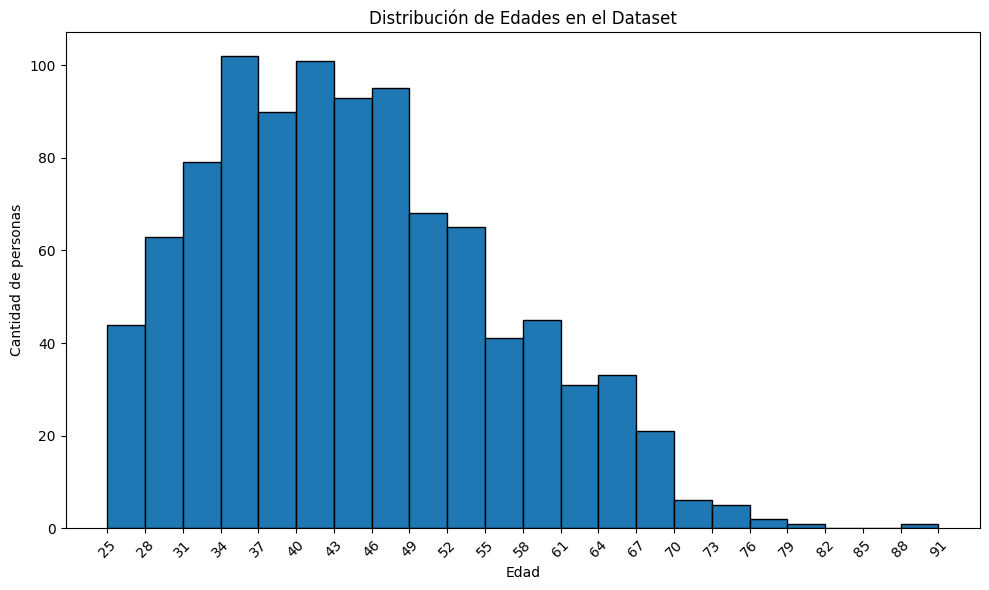

In [14]:
from matplotlib import pyplot as plt
import numpy as np

# Configuración de rangos personalizados para el histograma
min_age = data_selected["Age"].min()
max_age = data_selected["Age"].max()
bins = np.arange(min_age, max_age + 3, 3)

# Crear el histograma con bins personalizados
plt.figure(figsize=(10, 6))
plt.hist(data_selected["Age"], bins=bins, edgecolor="black")
plt.title("Distribución de Edades en el Dataset")
plt.xlabel("Edad")
plt.ylabel("Cantidad de personas")

# Personalización de ejes
plt.xticks(bins, rotation=45)
plt.tight_layout()
plt.show()

#### Reflexión y curiosidad en el análisis

Parece que la mayoría de las personas son jóvenes de entre 20 y 50 años, pero también encontramos un grupo de personas mayores, llegando hasta los 91 años.

Este detalle me resulta curioso, y me lleva a hacerme algunas preguntas:

- ¿Estarán comprando bicicletas para ellos mismos o para algún familiar?
- En el caso de que las compren para ellos, ¿Qué les motiva a hacerlo?
- ¿Por qué hay tan pocos compradores mayores? ¿Es una cuestión de movilidad, salud, o tal vez de estilo de vida? (Quizás sea una simple cuestión de densidad de población mayor en ciertas zonas)

Estas preguntas no son solo teóricas, ayudan a construir una imagen más rica y estratégica del cliente. Por ejemplo, si buscamos crear una campaña de marketing, no solo venderíamos una bicicleta, venderíamos la historia de una relación: como la de un abuelo que regala una bicicleta a su nieto, construyendo un vínculo duradero.

El trabajo de un científico de datos implica conectar datos con decisiones. Cada análisis es una oportunidad para comprender y resolver problemas de forma efectiva.

Quiero destacar la gran importancia de seguir nuestra curiosidad, porque si no te paras a mirar una gráfica sobre la edad porque te parece muy obvio o irrelevante, podrías no activar determinados gatillos en tu cerebro que te permitan hacerte preguntas clave para el análisis, y esto te impediría encontrar detalles valiosísimos que te hagan sacar verdadero partido a esto.

Recuerda que tu curiosidad es tu mejor aliada en cuanto a entender los datos y descubrir cómo sacarles el máximo partido.

## 1.7 Separar los datos en subconjuntos (Training y Testing)

Ahora vamos a separar nuestros datos en dos subconjuntos:

- **Conjunto de entrenamiento (training set)**: Usaremos este conjunto para entrenar al modelo.
- **Conjunto de prueba (testing set)**: Usaremos este conjunto para probar qué tan bien ha aprendido el modelo.

Para separar los datos, usaremos la función `train_test_split` de `sklearn`. **Scikit-learn** es una librería de Machine Learning muy popular con un montón de utilidades para nuestros proyectos de Machine Learning. Si quieres profundizar más en esta librería, puedes visitar su [documentación oficial](https://scikit-learn.org/stable/).

In [15]:
from sklearn.model_selection import train_test_split

# Separar características (X) y etiquetas (y)
train_data = data_selected.drop(columns=["Purchased Bike"])  # Características
train_labels = data_selected["Purchased Bike"]  # Etiquetas

# Separar en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(train_data,
                                                    train_labels,
                                                    test_size=0.2,
                                                    random_state=42)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")
print(f"Tamaño del conjunto de etiquetas de entrenamiento: {y_train.shape}")
print(f"Tamaño del conjunto de etiquetas de prueba: {y_test.shape}")


Tamaño del conjunto de entrenamiento: (788, 2)
Tamaño del conjunto de prueba: (198, 2)
Tamaño del conjunto de etiquetas de entrenamiento: (788,)
Tamaño del conjunto de etiquetas de prueba: (198,)


Aquí tenemos el resultado final. El conjunto de entrenamiento tiene 788 entradas, y el conjunto de prueba tiene 198.

> **Nota:** Los datos se mezclan de manera aleatoria para la división, esto es importante para que el modelo no se vea influenciado por la ordenación de los datos. El parámetro `random_state` se usa para mantener la misma mezcla cada vez que se ejecute el código y así poder comparar los resultados entre ejecuciones y al usar distintos modelos. El valor `42` es un número que se suele usar en estos casos por un tema de la cultura geek, pero realmente puedes usar tu número favorito, sólo ten en cuenta que si usas otro número, los resultados no serán los mismos que los de este notebook (te animo a experimentar). Si tienes curiosidad sobre el número 42, puedes leer más sobre ello aquí: [¿Por qué el número 42?](https://grsahagian.medium.com/what-is-random-state-42-d803402ee76b)

## 1.8 Entrenar el modelo

¡Genial! Me gusta mucho la parte de exploración de los datos, y es una parte clave en la que deberíamos pasar bastante tiempo, pero para mantener este notebook simple, vamos a ir rápidamente al grano, y vamos a entrenar nuestro modelo. (En otros notebooks podemos profundizar de manera íntegra en este apartado).

**¿Qué modelo usamos?**

Siempre es una buena idea comenzar con el modelo más simple. Esto nos da una **baseline o línea de base**: un punto de referencia inicial sobre el que podemos mejorar si lo necesitamos.

Para este ejemplo, vamos a usar **Regresión logística**, este modelo es un modelo de clasificación binaria bastante simple.

En concreto, para entrenar el modelo usaremos la función `LogisticRegression` de `sklearn`, que es una función bastante simple y que nos permite entrenar un modelo de Regresión logística de manera sencilla. Si quieres profundizar más en este modelo, puedes visitar su [documentación oficial](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression).

In [16]:
from sklearn.linear_model import LogisticRegression

# Crear el modelo
model = LogisticRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

LogisticRegression()

### 1.8.1. Hacer predicciones y evaluar la precisión

Una vez entrenado el modelo, podemos usarlo para hacer predicciones tanto en el conjunto de entrenamiento como en el de prueba y ver qué tan bien funciona.

In [17]:
from sklearn.metrics import accuracy_score
# Hacer predicciones 
y_train_pred = model.predict(X_train) # Conjunto de entrenamiento
y_test_pred = model.predict(X_test) # Conjunto de prueba

# Evaluar la precisión
train_accuracy = accuracy_score(y_train, y_train_pred) # Precisión en entrenamiento
test_accuracy = accuracy_score(y_test, y_test_pred) # Precisión en prueba

print(f'Precisión en el conjunto de entrenamiento: {train_accuracy * 100:.2f}%')
print(f'Precisión en el conjunto de prueba: {test_accuracy * 100:.2f}%')

Precisión en el conjunto de entrenamiento: 55.08%
Precisión en el conjunto de prueba: 60.61%


### 1.8.2. Análisis y reportes de resultados

Los resultados no parecen demasiado buenos. Si la precisión está cerca del 50%, es como si el modelo estuviera adivinando al azar. Además, la precisión en el conjunto de prueba es superior a la del conjunto de entrenamiento, lo cual es poco común y podría ser una señal de que algo no está funcionando bien.

¿Podemos confiar en un modelo así? Lógicamente no, pero nos sirve para entender el proceso, y nos da una baseline sobre la que podemos mejorar.

**Posibles causas de los resultados:**

- **Selección de Características**: Puede que edad y estado civil no sean suficientes para predecir si alguien comprará una bicicleta.
- **Simplicidad del Modelo**: Quizás un modelo más complejo podría captar patrones que la Regresión Logística no alcanza.
- **Cantidad de Datos**: Podríamos necesitar más datos para que el modelo pueda generalizar mejor.
- **Normalización de Datos**: A veces, normalizar o escalar las características ayuda a que el modelo las interprete correctamente.

La evaluación de los resultados es fundamental para entender por qué nuestro modelo se comporta de cierta manera, y tomar decisiones en base a ello.

In [18]:
from sklearn.metrics import classification_report, accuracy_score

# Reporte de clasificación y matriz de confusión
print("\nReporte de clasificación (conjunto de prueba):")
pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))


Reporte de clasificación (conjunto de prueba):


,0,1,accuracy,macro avg,weighted avg
precision,0.608333,0.602564,0.606061,0.605449,0.605594
recall,0.701923,0.500000,0.606061,0.600962,0.606061
f1-score,0.651786,0.546512,0.606061,0.599149,0.601807
support,104.000000,94.000000,0.606061,198.000000,198.000000


### 1.8.3. Importancia de las características

Como estamos usando un modelo de regresión logística, podemos observar la importancia relativa de cada característica en la predicción. Esto se refiere a cuánto "peso" le da el modelo a cada variable para tomar la decisión de si alguien comprará una bicicleta o no.

En la gráfica que verás a continuación, los coeficientes son negativos , esto significa que el modelo considera que esas características disminuyen la probabilidad de compra de una bicicleta. Cuanto más negativo es el coeficiente, mayor es el "impacto negativo" de esa característica en la predicción.

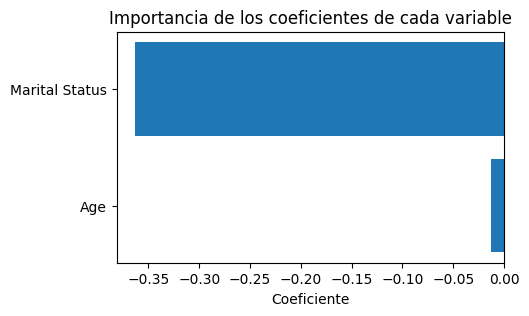

In [19]:
# Visualizar la importancia relativa de los coeficientes
feature_names = train_data.columns  # Nombres de las columnas de características
coef = model.coef_[0]  # Coeficientes de cada variable

plt.figure(figsize=(5, 3))
plt.barh(feature_names, coef)  # Etiquetas en el eje Y
plt.xlabel("Coeficiente")
plt.title("Importancia de los coeficientes de cada variable")
plt.show()


En este caso, vemos que la variable "Marital Status" (estado civil) tiene un coeficiente negativo considerable, mientras que "Age" (edad) tiene un coeficiente negativo menor. Esto indica que el modelo "cree" que las personas casadas tienden a comprar menos bicicletas. Aunque, si revisamos los datos, veremos que esta diferencia en realidad no es tan significativa.

Por ejemplo, vamos a contar cuántas personas casadas y solteras compraron bicicletas en nuestros datos:

In [20]:
print("Cantidad de personas casadas que han comprado una bicicleta:",
      data_selected[(data_selected['Marital Status'] == 1) & (data_selected['Purchased Bike'] == 1)].shape[0])
print("Cantidad de personas solteras que han comprado una bicicleta:",
      data_selected[(data_selected['Marital Status'] == 0) & (data_selected['Purchased Bike'] == 1)].shape[0])

Cantidad de personas casadas que han comprado una bicicleta: 227
Cantidad de personas solteras que han comprado una bicicleta: 246


Como ves, aunque hay una diferencia, no es tan grande. Esto nos indica que el modelo puede estar sesgado. Es un buen ejemplo de cómo los modelos pueden interpretar relaciones que no siempre coinciden con nuestra intuición o con lo que observamos al revisar los datos.

### 1.8.4. Matriz de confusión

Una forma efectiva y visual (y de mis favoritas) de evaluar el rendimiento de un modelo es mediante la matriz de confusión. Esta matriz nos muestra cuántas veces el modelo ha acertado y cuántas ha fallado, además de qué tipo de aciertos y errores ha cometido.

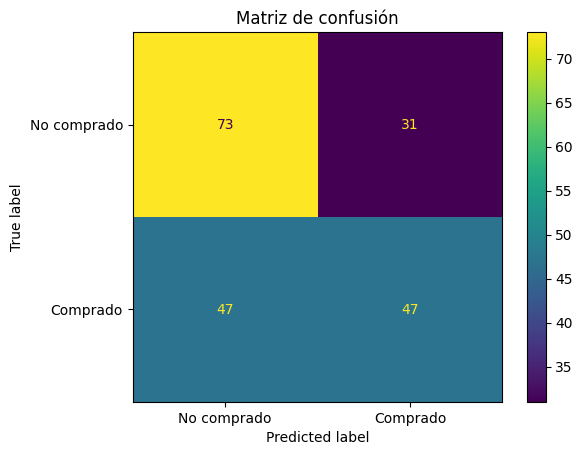

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Mostrar la matriz de confusión con etiquetas
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=["No comprado", "Comprado"])
plt.title("Matriz de confusión")
plt.show()

En la matriz de confusión, vemos lo siguiente:

- La **diagonal descendente** (de la esquina superior izquierda a la inferior derecha) muestra los aciertos del modelo:
    - Arriba a la izquierda: Predijo correctamente "No comprado" (Verdaderos Negativos).
    - Abajo a la derecha: Predijo correctamente "Comprado" (Verdaderos Positivos).
- La **diagonal ascendente** (de la esquina inferior izquierda a la superior derecha) muestra los errores del modelo:
    - Abajo a la izquierda: Predijo "No comprado" cuando en realidad era "Comprado" (Falsos Negativos).
    - Arriba a la derecha: Predijo "Comprado" cuando en realidad era "No comprado" (Falsos Positivos).

En este caso específico, el modelo acertó en 120 casos (73 Verdaderos Negativos y 47 Verdaderos Positivos), y falló en 78 casos (47 Falsos Negativos y 31 Falsos Positivos). Esto nos da una buena idea de cómo se comporta el modelo y hacia dónde puede estar sesgado.

#### Análisis de rendimiento: Recall y Precisión

En términos de métricas de rendimiento, podemos analizar dos conceptos clave:

- **Recall (sensibilidad)**: Indica la capacidad del modelo para encontrar todos los casos positivos. En este contexto, nos dice qué tan bien el modelo identifica a los compradores de bicicletas.
- **Precisión**: Mide cómo de preciso es el modelo al hacer una predicción positiva, es decir, qué porcentaje de las predicciones "Comprado" eran realmente correctas.

Puedes volver al punto 1.8.2. (Análisis y reportes de resultados) para ver las métricas de nuestro modelo.

>**Nota:** Dependiendo del caso, a veces es más importante optimizar una métrica que otra. Si quieres profundizar en estos conceptos, te recomiendo explorar este [fragmento de curso de Machine Learning de Google](https://developers.google.com/machine-learning/crash-course/classification/accuracy-precision-recall?hl=es-419) en el que tienes un apartado interactivo en el que puedes ver cómo afecta el rendimiento de un modelo a distintas métricas.

## 1.9. Probando nuestro modelo: Simulación de despliegue

Ahora que tenemos nuestro modelo entrenado, imaginemos que lo desplegamos en nuestra tienda de bicicletas para ayudarnos a identificar posibles compradores. Esto nos permitirá enfocar nuestros esfuerzos de marketing y ofrecer una atención personalizada a los clientes con mayor probabilidad de comprar una bicicleta.

Para simular este escenario, vamos a crear un pequeño dataset sintético que represente a 10 personas que han visitado nuestra tienda hoy.

In [22]:
import random
# Crear un pequeño dataset sintético
potential_customers = pd.DataFrame({
    "Age": [random.randint(18, 90) for _ in range(10)],
    "Marital Status": [random.choice([1, 0]) for _ in range(10)]
})

potential_customers

,Age,Marital Status
0,66,0
1,60,1
2,25,0
3,37,0
4,41,1
5,25,0
6,38,0
7,20,1
8,30,0
9,84,0


### 1.9.1. Predicción sobre el dataset sintético

Ahora vamos a utilizar nuestro modelo para predecir si cada cliente es probable que compre una bicicleta. Añadimos una columna con las predicciones al dataset.

In [23]:
# Prediciendo sobre el dataset sintético
potential_customers["Purchased Bike"] = model.predict(potential_customers[["Age", "Marital Status"]])
potential_customers

,Age,Marital Status,Purchased Bike
0,66,0,0
1,60,1,0
2,25,0,1
3,37,0,1
4,41,1,0
5,25,0,1
6,38,0,1
7,20,1,1
8,30,0,1
9,84,0,0


En esta tabla final, "Purchased Bike" indica si el modelo predice que el cliente comprará (1) o no comprará (0) una bicicleta. Esta información podría ser muy útil para personalizar la atención al cliente en tiempo real. Si nuestro modelo funcionara de manera precisa, nos permitiría priorizar recursos de venta y marketing hacia los clientes con mayor probabilidad de compra, maximizando la efectividad de nuestras estrategias. Sin duda, un modelo muy útil si tuviéramos una tienda de bicicletas.

### 1.9.2. Próximos pasos para mejorar el modelo

Para optimizar el rendimiento del modelo y su utilidad en situaciones reales, podríamos considerar:

- **Probar con otros parámetros:** Ajustar los hiperparámetros del modelo para mejorar su precisión.
- **Normalizar o escalar los datos:** Asegurarnos de que todas las variables están en escalas comparables para evitar sesgos en el modelo.
- **Explorar otros modelos de clasificación:** Probar algoritmos adicionales como árboles de decisión, SVM o redes neuronales para comparar su rendimiento.
- **Incluir más características:** Si tenemos acceso a más datos sobre los clientes (como ingresos, ocupación o distancia de desplazamiento), podríamos mejorar la precisión del modelo.

Para concluir, vamos a ver un ejemplo final donde unimos todos estos elementos para entrenar un nuevo modelo usando el conjunto completo de datos y aplicando algunas mejoras.


## 1.10. Ejemplo usando todos los datos


Para cerrar con este caso práctico, voy a juntar todo lo que hemos visto en un único bloque en el que usaremos todos los datos para ver si así mejora el rendimiento del modelo.


In [24]:
# Importar las librerías necesarias
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


# Eliminar filas con datos faltantes
data = data.dropna()

# Separar las etiquetas
train_labels = data['Purchased Bike']
# Eliminar la etiqueta de los datos para quedarnos con las características
train_data = data.drop(columns=['Purchased Bike'])

# Identificar las columnas categóricas y numéricas
categorical_cols = train_data.select_dtypes(include=['object']).columns
numeric_cols = train_data.select_dtypes(include=['int64', 'float64']).columns

print(f"Columnas categóricas: {list(categorical_cols)}")
print(f"Columnas numéricas: {list(numeric_cols)}")

# Codificar variables categóricas utilizando OneHotEncoder
# En otro momento momento profundizaremos en este concepto
onehotencoder = OneHotEncoder(drop='first')
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', onehotencoder, categorical_cols)
    ],
    remainder='passthrough'  # Dejar las columnas numéricas sin transformar
)

# Aplicar la transformación
train_data = column_transformer.fit_transform(train_data)

# Obtener los nombres de las nuevas características después de OneHotEncoding
onehot_features = column_transformer.named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_features = np.concatenate([onehot_features, numeric_cols])

# Convertir train_data a DataFrame para manejar mejor las columnas
train_data = pd.DataFrame(train_data, columns=all_features)

# Escalar las características numéricas
scaler = StandardScaler()
train_data[numeric_cols] = scaler.fit_transform(train_data[numeric_cols])

# Si la variable objetivo es categórica, codificarla
if train_labels.dtype == 'object':
    train_labels = LabelEncoder().fit_transform(train_labels)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    train_data, train_labels, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de Regresión Logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Realizar predicciones
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluar el modelo
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Precisión en el conjunto de entrenamiento: {train_accuracy * 100:.2f}%')
print(f'Precisión en el conjunto de prueba: {test_accuracy * 100:.2f}%')
print("\nReporte de clasificación en el conjunto de prueba:")
print(classification_report(y_test, y_test_pred))

Columnas categóricas: ['Marital Status', 'Gender', 'Education', 'Occupation', 'Home Owner', 'Commute Distance', 'Region']
Columnas numéricas: ['ID', 'Income', 'Children', 'Cars', 'Age']
Precisión en el conjunto de entrenamiento: 67.15%
Precisión en el conjunto de prueba: 63.87%

Reporte de clasificación en el conjunto de prueba:
              precision    recall  f1-score   support

           0       0.61      0.71      0.66        93
           1       0.67      0.57      0.62        98

    accuracy                           0.64       191
   macro avg       0.64      0.64      0.64       191
weighted avg       0.64      0.64      0.64       191



Podemos observar que el modelo ha mejorado con respecto al ejemplo anterior, aunque aún tiene margen de mejora. Este incremento en el rendimiento sugiere que el uso de características adicionales en el entrenamiento ayuda a mejorar la precisión del modelo. Sin embargo, los resultados siguen siendo bastante pobres, esto indica que podemos seguir ajustando o mejorando el modelo bastante para obtener predicciones más precisas.

También notamos una diferencia esperada en el rendimiento entre los conjuntos de entrenamiento (67.15%) y de prueba (63.87%). Esto es más normal y muestra que el modelo se ajusta razonablemente bien a los datos de entrenamiento sin mostrar un sobreajuste excesivo.

### 1.10.1. Análisis de los Coeficientes del Modelo

Ahora vamos a visualizar los coeficientes del modelo nuevamente, esta vez con todos los datos, para interpretar la importancia relativa de cada característica en las predicciones.

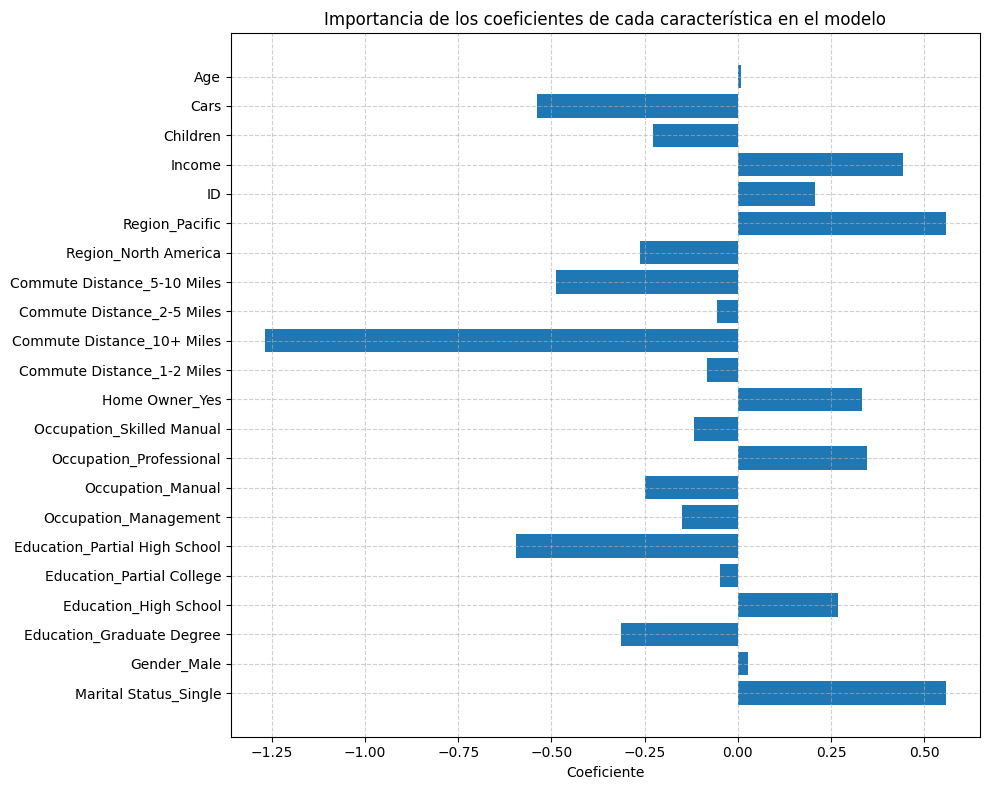

In [25]:
# Analizar los coeficientes del modelo
coef = model.coef_[0]  # Coeficientes de cada característica

# Crear la gráfica de importancia de coeficientes
plt.figure(figsize=(10, 8))
plt.barh(all_features, coef)  # Etiquetas en el eje Y basadas en los nombres de las características
plt.xlabel("Coeficiente")
plt.title("Importancia de los coeficientes de cada característica en el modelo")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



En la gráfica, observamos varios patrones interesantes:

- **Trayectos largos con correlación negativa**: Las personas con desplazamientos superiores a 10 millas (~16 km) muestran menor probabilidad de comprar una bicicleta, probablemente porque no consideran la bicicleta como una opción práctica para su trayecto. Otras distancias también muestran una tendencia negativa, aunque menos pronunciada.
- **Personas solteras con correlación positiva**: Estar soltero parece ser un predictor de compra de bicicletas, lo que sugiere que las personas solteras podrían estar más inclinadas a usarlas para transporte o recreación.
- **Ingresos con correlación positiva**: A mayor ingreso, mayor es la probabilidad de comprar una bicicleta, lo cual es bastante intuitivo.

Explorar estos resultados es útil para identificar patrones que pueden influir en nuestra estrategia de ventas en la tienda de bicicletas. Sin embargo, es fundamental recordar que los coeficientes del modelo reflejan correlación y no causalidad. Esto significa que, aunque el modelo identifica asociaciones útiles, no podemos asumir que una característica provoca el comportamiento de compra. Cuanto mejor sea nuestro modelo, más fiel será esta interpretación, pero siempre teniendo en cuenta que es una interpretación.

### 1.10.2. Matriz de confusión

Para finalizar, veamos la matriz de confusión del nuevo modelo.

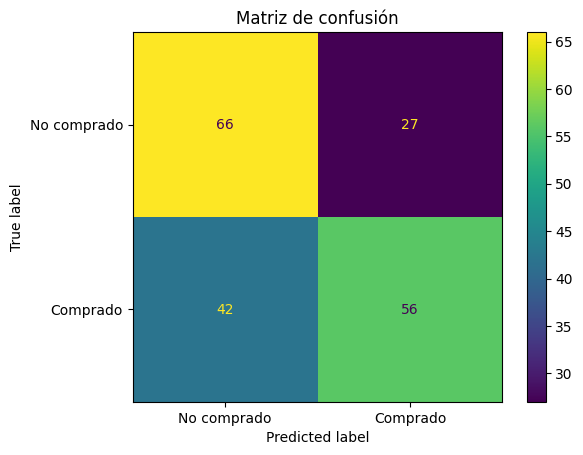

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Mostrar la matriz de confusión con etiquetas
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=["No comprado", "Comprado"])
plt.title("Matriz de confusión")
plt.show()

# 2. Regresión

# Referencias y recursos